# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [21]:
#1
import numpy as np
A = np.ndarray(shape=(3, 4), dtype=bool)
for i in range(3):
    for j in range(4):
        A[i][j] = True
print(A)
#2
B = np.diagflat([1, 2, 3, 4], k=-1)
print(B)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [22]:
#3
zeros = np.zeros((8,8))
zeros[::2,1::2] = 1
zeros[1::2,::2] = 1
print(zeros)
#4
v = np.random.randint(10, 100, 4)
print(v, end="->")
mask = np.array([False, False, False, False])
for i in range(4):
    if v[i]%2==0:
        continue
    else:
        mask[i] = True
v[mask] *= (-1)
print(v)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]
[61 87 61 19]->[-61 -87 -61 -19]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [48]:
#5
A = np.random.rand(5, 5)
B = np.random.rand(5, 5)
if np.dot(A, B).T.all() == np.dot(B.T, A.T).all():
    print("(AB)^T = B^T*A^T", end="\n\n")
    
#6
u = np.random.rand(3)
v = np.random.rand(3)
uv = np.outer(u, v)
print(uv, end="\n\n")
u = u[:, np.newaxis]
uv =u*v
print(uv)


(AB)^T = B^T*A^T

[[0.34058096 0.22255823 0.17831977]
 [0.42198191 0.27575102 0.22093929]
 [0.13793745 0.09013749 0.07222063]]

[[0.34058096 0.22255823 0.17831977]
 [0.42198191 0.27575102 0.22093929]
 [0.13793745 0.09013749 0.07222063]]


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [52]:
a = np.array([[0,1], [1,0]])
A = np.tile(a, (4,4))
print(A)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [73]:
A = integer_spiral(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [69]:
def integer_spiral_numpy(n):
    
        if n % 2 == 0:
            print("n musí být liché.")
            return 0
        else:
            A = np.zeros((n, n ))
            a1 = n // 2
            i = 1
            k = 1
            A[a1, a1] = i
            while k <=a1:
                A[a1 - k, a1 - k : a1 + k] = np.arange(i + 1, i + k * 2 + 1)[::-1]
                i += k * 2 + 1
                A[a1 + 1 - k : a1 + 1 + k, a1 - k] = np.arange(i, i + k * 2)
                i += k * 2
                A[a1 + k, a1 + 1 - k : a1 + 1 + k] = np.arange(i, i + k * 2)
                i += k * 2 - 1
                A[a1 - k : a1 + k, a1 + k] = np.arange(i + 1, i + k * 2 + 1)[::-1]
                i += k * 2
                k += 1
            return A
       
    
integer_spiral_numpy(7)

array([[31., 30., 29., 28., 27., 26., 49.],
       [32., 13., 12., 11., 10., 25., 48.],
       [33., 14.,  3.,  2.,  9., 24., 47.],
       [34., 15.,  4.,  1.,  8., 23., 46.],
       [35., 16.,  5.,  6.,  7., 22., 45.],
       [36., 17., 18., 19., 20., 21., 44.],
       [37., 38., 39., 40., 41., 42., 43.]])

## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
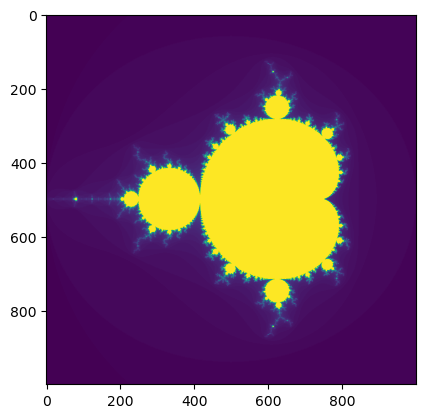

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [67]:
import matplotlib.pyplot as plt 
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    Re, Im = np.mgrid[x_min : x_max : n * 1j  , y_min : y_max : n * 1j]
    c = Re + Im * 1j 
    z = np.zeros(c.shape)
    divergence_matrix = np.zeros(c.shape)
    for i in range(k):
        z = z**2 + c
        divergence_matrix += 1 * (np.abs(z) < 2)
    return divergence_matrix.T

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3020\3182048463.py:8: RuntimeWarning: overflow encountered in square
  z = z**2 + c
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3020\3182048463.py:8: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3020\3182048463.py:9: RuntimeWarning: overflow encountered in absolute
  divergence_matrix += 1 * (np.abs(z) < 2)


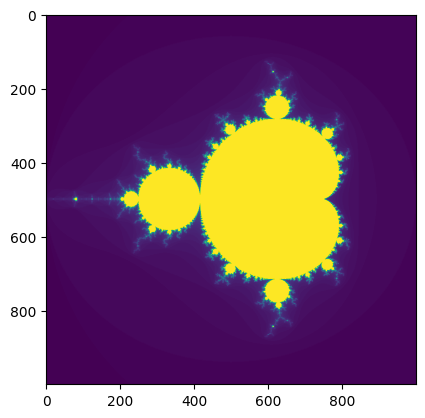

In [68]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).